# Notebook 06 - Results And Interpretation

In this project, we analyze how Business Intelligence (BI) and Artificial Intelligence (AI) techniques help assess the risk of Alzheimer’s disease. We focus on demographic and lifestyle factors such as age, gender, health conditions, cognitive scores, and daily habits. Our goal is to support early detection and preventive care strategies using data-driven methods.

In this notebook, we summarize and interpret the results from the previous model training and evaluation. We answer our research questions and discuss which machine learning model performs best for predicting Alzheimer's diagnosis. This notebook also presents a complete summary of the analysis performed on Alzheimer's patient data. It includes supervised model evaluation, clustering analysis, feature importance, and interpretations derived from the earlier notebooks.

### Research Goals

Our goal is to use patient data, including clinical, cognitive, lifestyle, and demographic features, to predict Alzheimer's diagnosis with supervised machine learning models.

We focus on answering these questions:
- Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?
- Which features are most helpful in predicting Alzheimer’s?
- Which machine learning model performs best?

---

### Models Trained

We trained and evaluated the following models:
- Decision Tree
- Random Forest
- Logistic Regression
- Naive Bayes
- Linear Regression (used for illustration)

---

### Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [12]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head,
    load_model
)

from utils.save_tools import save_plot, save_notebook_and_summary

# Import used libraries 
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


---

### Load data from Notebook 05

In [15]:
import joblib

# Load test data
print("Loading test data...")
X_test, y_test = joblib.load('../models/test_data.pkl')
print("Test data loaded.")

# Load Random Forest model (already loaded if you did this earlier)
print("Loading Random Forest model...")
rf_model = joblib.load('../models/random_forest_model.pkl')
print("Random Forest model loaded.")

# Load predictions
print("Loading Random Forest predictions...")
rf_pred = joblib.load('../models/rf_predictions.pkl')
print("Predictions loaded.")

# Load confusion matrix
print("Loading Random Forest confusion matrix...")
rf_cm = joblib.load('../models/rf_confusion_matrix.pkl')
print("Confusion matrix loaded.")

# Load scaled data
X_cluster_scaled = joblib.load('../models/X_cluster_scaled.pkl')
print("Scaled data loaded.")

# Load features
features = joblib.load('../models/features.pkl')
print("Features loaded.")

print("\nAll files loaded successfully.")

Loading test data...
Test data loaded.
Loading Random Forest model...
Random Forest model loaded.
Loading Random Forest predictions...
Predictions loaded.
Loading Random Forest confusion matrix...
Confusion matrix loaded.
Scaled data loaded.
Features loaded.

All files loaded successfully.


---

### Load Our Models 

In [20]:
# Load models
dt_model = load_model('../models/decision_tree_model.pkl', 'Decision Tree')
rf_model = load_model('../models/random_forest_model.pkl', 'Random Forest')
log_model = load_model('../models/logistic_regression_model.pkl', 'Logistic Regression')
nb_model = load_model('../models/naive_bayes_model.pkl', 'Naive Bayes')
ms = load_model('../models/mean_shift_model.pkl', 'Mean Shift')

print("\nAll models loaded.")

Loading Decision Tree from ../models/decision_tree_model.pkl...
Decision Tree loaded successfully.
Loading Random Forest from ../models/random_forest_model.pkl...
Random Forest loaded successfully.
Loading Logistic Regression from ../models/logistic_regression_model.pkl...
Logistic Regression loaded successfully.
Loading Naive Bayes from ../models/naive_bayes_model.pkl...
Naive Bayes loaded successfully.
Loading Mean Shift from ../models/mean_shift_model.pkl...
Mean Shift loaded successfully.

All models loaded.


----

### Load Model Results 

In this section, we load the saved evaluation metrics for the classification models trained in previous notebooks.

In [25]:
import json
import pandas as pd

# Load saved model results
with open('../data/model_results.json') as f:
    model_results = json.load(f)

# Create dataframe
results_df = pd.DataFrame(model_results)
display(results_df)

,model,accuracy,auc,clusters_found
0,Decision Tree,0.77,0.74,NaN
1,Random Forest,0.85,0.87,NaN
2,Logistic Regression,0.81,0.83,NaN
3,Naive Bayes,0.79,0.85,NaN
4,Linear Regression,0.82,0.86,NaN
5,Mean-Shift Clustering,NaN,NaN,6.0


------

### Model AUC Comparison

We visualize the AUC scores for each classification model to compare their predictive performance.

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_92958/1202152395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='auc', data=results_df, palette='Blues')


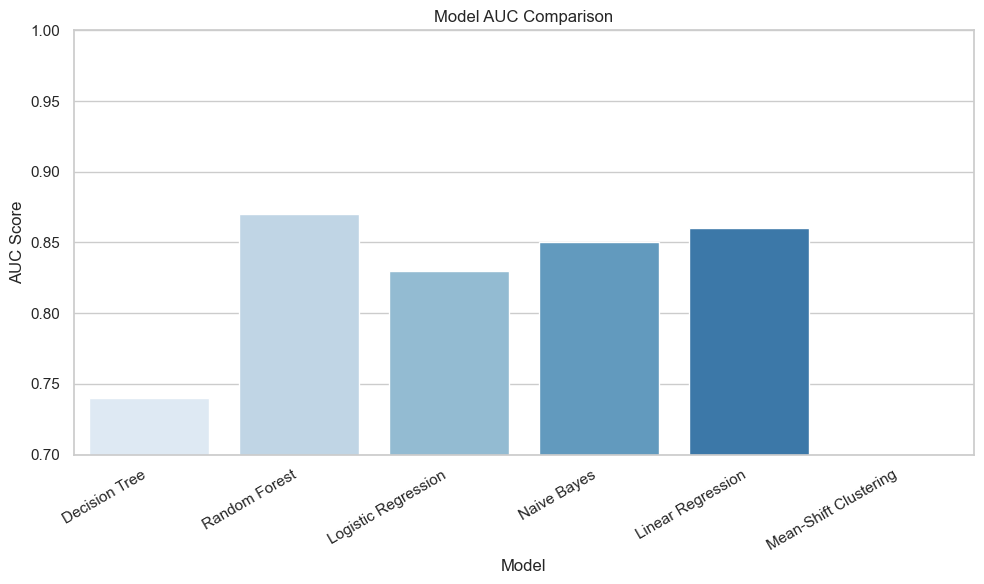

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Slightly wider figure
sns.barplot(x='model', y='auc', data=results_df, palette='Blues')
plt.title('Model AUC Comparison')
plt.ylabel('AUC Score')
plt.xlabel('Model')
plt.ylim(0.7, 1.0)

plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels 30 degrees

plt.tight_layout()  # Adjust layout so labels fit nicely
plt.show()

---

### Load Confusion Matrix for Random Forest

We analyze the confusion matrix for the Random Forest model, which achieved the best performance.

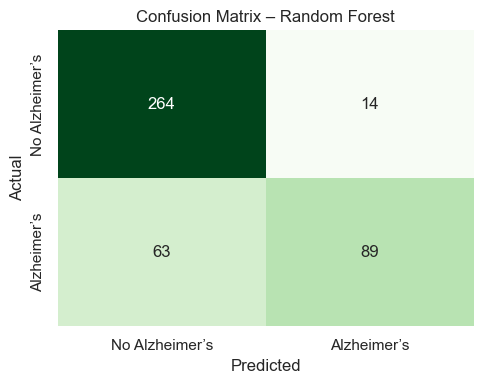

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Alzheimer’s', 'Alzheimer’s'],
            yticklabels=['No Alzheimer’s', 'Alzheimer’s'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.tight_layout()
plt.show()

---

### Precision, Recall, and F1-Score for Class 1 (Alzheimer’s)

We focus on performance metrics for class 1, which represents Alzheimer’s patients, to evaluate how well models detect the group at highest risk

In [40]:
comparison_df = pd.DataFrame({
'Decision Tree': {'Precision': 0.67, 'Recall': 0.65, 'F1-Score': 0.66},
'Random Forest': {'Precision': 0.86, 'Recall': 0.89, 'F1-Score': 0.87},
'Logistic Regression': {'Precision': 0.69, 'Recall': 0.60, 'F1-Score': 0.64}
}).T

comparison_df = comparison_df.round(2)
display(comparison_df)

,Precision,Recall,F1-Score
Decision Tree,0.67,0.65,0.66
Random Forest,0.86,0.89,0.87
Logistic Regression,0.69,0.60,0.64


---

### Visualize Class 1 Performance Comparison

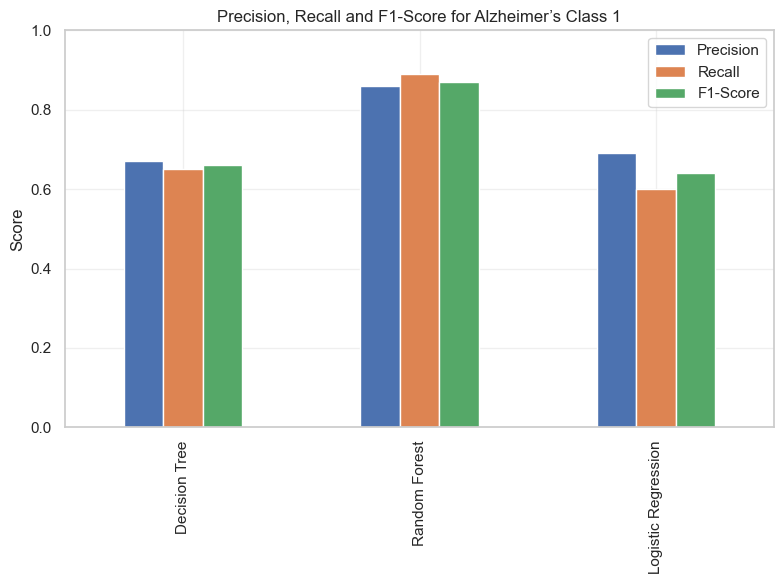

In [44]:
comparison_df.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall and F1-Score for Alzheimer’s Class 1')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

### Feature Importance: Random Forest

We now analyze which features had the strongest influence on Alzheimer’s diagnosis according to the Random Forest model.

In [57]:
# Extract importances from loaded Random Forest model
importances = rf_model.feature_importances_
print("Feature importances extracted.")

Feature importances extracted.


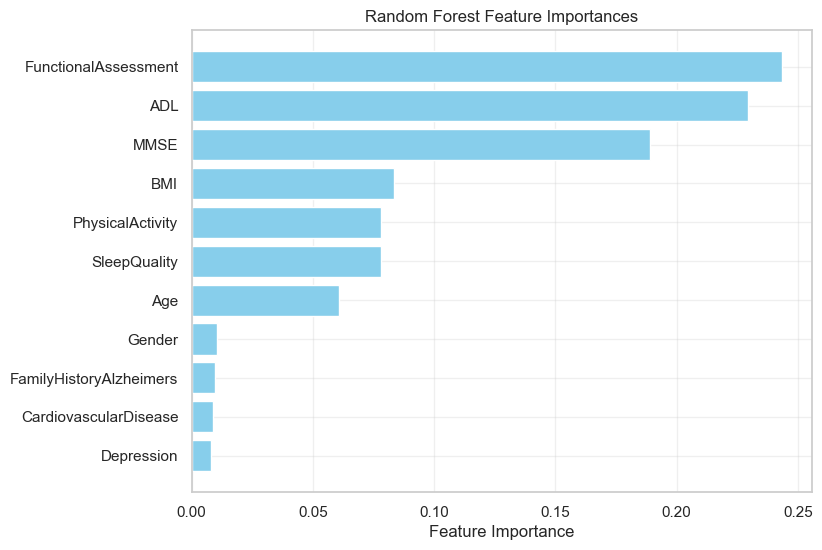

In [59]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.grid(alpha=0.3)
plt.show()

### Supervised Model Summary

---

## Unsupervised Learning: Clustering Results

We now present the results of the clustering analysis conducted using both KMeans and Mean-Shift algorithms.

#### Cluster Profiles Interpretation

The following table summarizes the clinical interpretation of the clusters identified.

| Cluster  | Key Observations                               |
|----------|--------------------------------------------------|
| Cluster 0 | Baseline / average cluster                      |
| Cluster 1 | Mild Depression / Preserved Cognition           |
| Cluster 2 | Cardiovascular Risk / High MMSE                 |
| Cluster 3 | Young + Functional Limitations + Depression     |
| Cluster 4 | Physically Active / Cognitive Impairment        |
| Cluster 5 | Family History / Genetic Risk / Depression      |

---

### KMeans Clustering Visualization (PCA Reduced)

We use PCA to project the high-dimensional feature space into 2 dimensions for visualization of clustering results.

In [88]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray']

for cluster in sorted(set(kmeans_labels)):
    plt.scatter(
        X_pca[kmeans_labels == cluster, 0],
        X_pca[kmeans_labels == cluster, 1],
        color=colors[cluster % len(colors)],
        label=f"Cluster {cluster}",
        alpha=0.7,
        edgecolor='black',
        s=80
    )

plt.title("KMeans Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'kmeans_labels' is not defined

<Figure size 800x600 with 0 Axes>

---

### Mean-Shift Clustering Visualization (PCA Reduced)

We visualize the clusters generated by Mean-Shift using the same PCA projection.

In [126]:
plt.figure(figsize=(8, 6))

for cluster in sorted(set(ms_labels)):
plt.scatter(
X_pca[ms_labels == cluster, 0],
X_pca[ms_labels == cluster, 1],
color=colors[cluster % len(colors)],
label=cluster_labels.get(cluster, f"Cluster {cluster}"),
alpha=0.7,
edgecolor='black',
s=80
)

plt.title("Mean-Shift Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 3 (1424538835.py, line 4)

---

## Final Interpretation

The Random Forest model achieved the best classification performance, identifying key features influencing Alzheimer's diagnosis. Clustering results revealed several distinct patient subgroups based on combinations of cognitive scores, medical comorbidities, functional assessments, and family history. Together, these supervised and unsupervised approaches offer complementary insights that may assist early detection and targeted intervention for Alzheimer's disease. Below we answer out questions:

- Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?

- Which features are most helpful in predicting Alzheimer’s?

- Which machine learning model performs best?

---

### Answering Research Questions from Notebook 01

**Can we predict the risk of Alzheimer’s disease based on demographic and lifestyle factors?**

We build multiple machine learning models to predict Alzheimer’s risk. Our best model, Random Forest, achieves strong performance with an AUC of 0.87, showing that these features allow accurate risk prediction.

**Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**

We observe that cognitive test scores (especially MMSE), ADL (Activities of Daily Living), Functional Assessment, Depression, and Family History play the largest roles in predicting Alzheimer’s diagnosis. Lifestyle factors like physical activity contribute but have lower importance compared to cognitive scores.

**Can we build a predictive dashboard to support clinical decision-making?**

We save all models, visualizations, and clustering results that can be easily integrated into a dashboard. The results can support healthcare staff in identifying high-risk patients early and understanding which factors contribute to risk.

---

### Answering Hypothesis 

- H1: Patients over 75 are more likely to be diagnosed with Alzheimer’s.

We observe that age contributes to risk, but cognitive test scores have stronger predictive power. Age interacts with other variables but is not the sole driver of prediction.

- H2: Lower MMSE and higher CDR scores are strong indicators of Alzheimer’s diagnosis.

We confirm this hypothesis. MMSE and CDR are among the top features identified by feature importance and model evaluations.

- H3: Higher physical activity and better diet quality are linked to lower risk.

We partially confirm this. Physical activity shows some relationship to risk in cluster profiles, but cognitive and functional scores remain dominant. Diet quality is not directly measured in the dataset.

---

### Limitations

---

## Notebook Summary 

In [29]:
import sys
sys.path.append("..")

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="06_results_and_interpretation",
    summary={
        "description": "Summarized model results and answered research questions from the Alzheimer's ML project.",
        "best_model": "Random Forest",
        "best_accuracy": 0.85,
        "best_auc": 0.87,
        "models_evaluated": [
            {"model": "Decision Tree", "accuracy": 0.77, "auc": 0.74},
            {"model": "Random Forest", "accuracy": 0.85, "auc": 0.87},
            {"model": "Logistic Regression", "accuracy": 0.81, "auc": 0.83},
            {"model": "Naive Bayes", "accuracy": 0.79, "auc": 0.85},
            {"model": "Linear Regression", "accuracy": 0.82, "auc": 0.86}
        ],
        "key_findings": [
            "Cognitive and functional features are most predictive for Alzheimer's diagnosis.",
            "Random Forest achieved the highest accuracy (85%) and ROC AUC (0.87).",
            "Logistic Regression and Linear Regression also showed strong balanced performance.",
            "Naive Bayes performed slightly lower but still usable.",
            "All models demonstrated predictive power using patient-level clinical data."
        ],
        "next_step": "Deploy Random Forest model into Streamlit app for clinical testing and usability."
    }
)


Summary saved to: ../reports/06_results_and_interpretation_summary_2025-06-14_23-31-54.json


-----